In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [13]:
ds = load_breast_cancer()
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
print(ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head(7)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [16]:
df.shape

(569, 30)

In [17]:
# import klasy odpowiedzialnej za PCA
from sklearn.decomposition import PCA

In [26]:
N_DIM = 5
pca = PCA(n_components=N_DIM, random_state=0)
X_pca = pca.fit_transform(df)
X_pca.shape

(569, 5)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [30]:
%%timeit -r 10 -n 100

# estymator na danych oryginalnych
X_train, X_test, y_train, y_test = train_test_split(df, ds.target, test_size=.2, random_state=0)

model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )


10.2 ms ± 142 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [31]:
%%timeit -r 10 -n 100

# estymator na danych PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, ds.target, test_size=.2, random_state=0)

model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
#print(model.score(X_test, y_test))
#pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )


2.04 ms ± 118 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<AxesSubplot:>

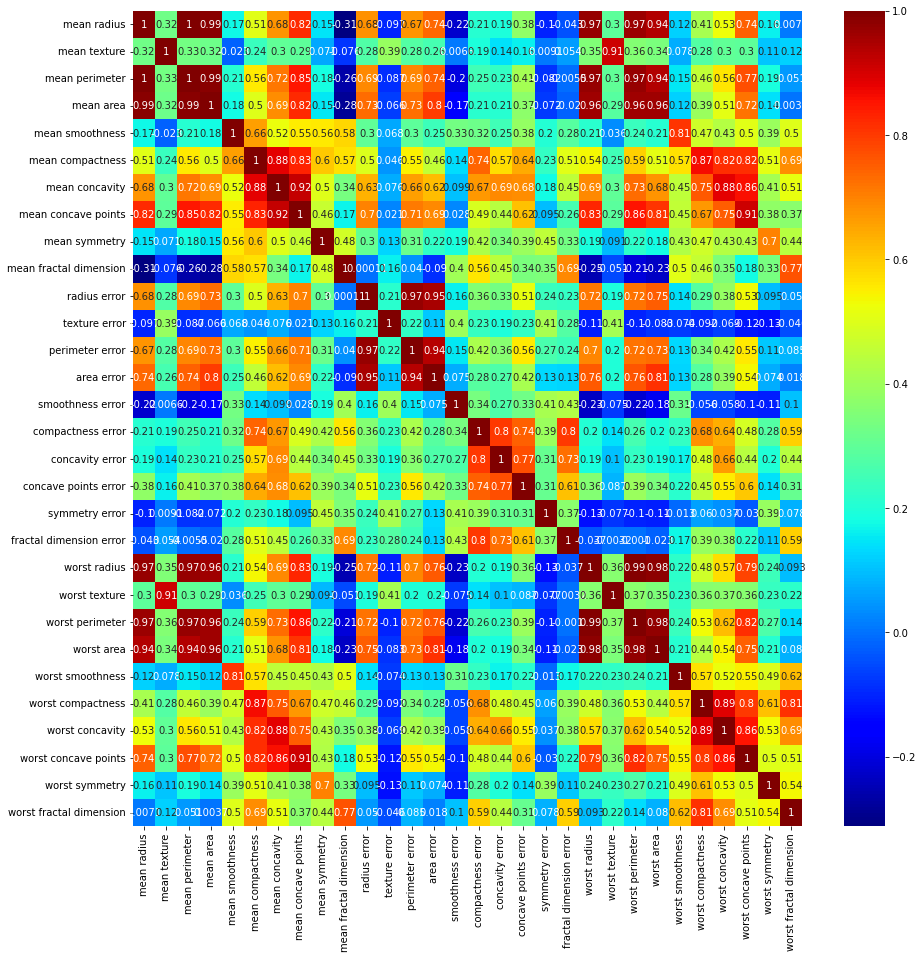

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap( df.corr(), annot=True, cmap="jet" )

In [36]:
pd.DataFrame(X_pca).corr()

,0,1,2,3,4
0,1.000000e+00,-1.619301e-17,6.015888e-17,-3.706649e-17,2.892332e-17
1,-1.619301e-17,1.000000e+00,-2.117758e-17,4.750085e-17,-4.447842e-17
2,6.015888e-17,-2.117758e-17,1.000000e+00,2.940476e-17,7.465772e-17
3,-3.706649e-17,4.750085e-17,2.940476e-17,1.000000e+00,-4.745022e-16
4,2.892332e-17,-4.447842e-17,7.465772e-17,-4.745022e-16,1.000000e+00


<AxesSubplot:>

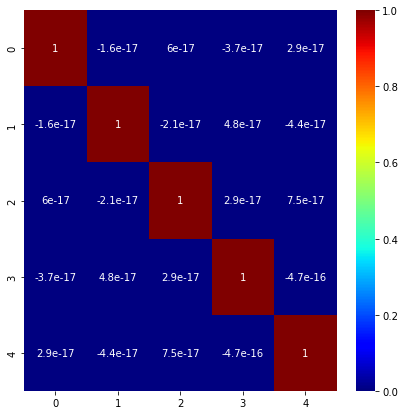

In [37]:
plt.figure(figsize=(7,7))
sns.heatmap( pd.DataFrame(X_pca).corr() , annot=True, cmap="jet" )

In [39]:
df["target"] = ds.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [41]:
dfc = df.corr()
dfc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
worst concavity,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,0.433721,0.346234,...,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,-0.659610
worst concave points,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,...,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,-0.793566
worst symmetry,0.163953,0.105008,0.189115,0.143570,0.394309,0.510223,0.409464,0.375744,0.699826,0.334019,...,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,-0.416294
worst fractal dimension,0.007066,0.119205,0.051019,0.003738,0.499316,0.687382,0.514930,0.368661,0.438413,0.767297,...,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,-0.323872


In [48]:
best_cols = list( dfc.loc["target"].abs().sort_values(ascending=False).iloc[1:6].index )
best_cols

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter']

In [49]:
# estymator na danych oryginalnych
X_train, X_test, y_train, y_test = train_test_split(df[best_cols], df.target, test_size=.2, random_state=0)

model = DecisionTreeClassifier(max_depth=7, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.9473684210526315


,0,1
0,42,5
1,1,66
